https://www.kaggle.com/datasets/mfekadu/darpa-timit-acousticphonetic-continuous-speech

In [1]:
# Load and listen to the audio file
import librosa
import IPython.display as ipd

# Specify the path to the audio file
audiofilepath= '/mnt/c/Users/Robert/Downloads/timit-dataset/data/TEST/DR1/FAKS0/SA2.WAV.wav'

# Load the audio file
audio, sample_rate = librosa.load(audiofilepath)

# Play the audio file in the notebook
ipd.display(ipd.Audio(data=audio, rate=sample_rate))


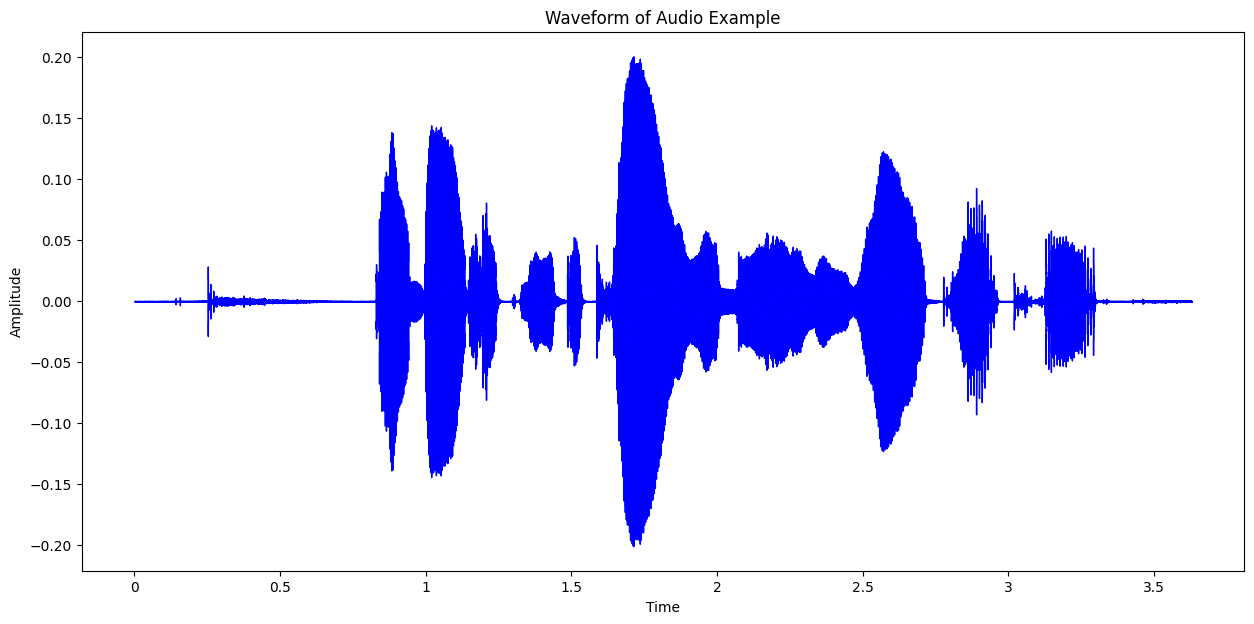

In [2]:
%matplotlib inline
import librosa.display
import matplotlib.pyplot as plt

# Plot our example audio file's waveform
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Waveform of Audio Example')
plt.ylabel('Amplitude')

_ = librosa.display.waveshow(audio, color='blue')

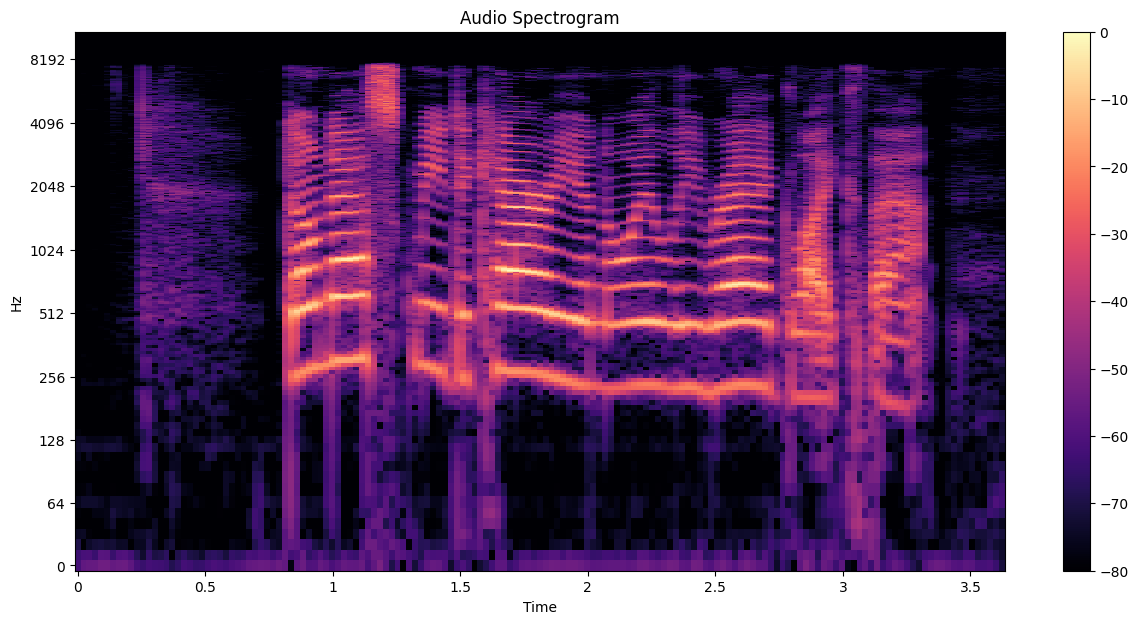

In [3]:
import numpy as np

# Get spectrogram using Librosa's Short-Time Fourier Transform (stft)
spec = np.abs(librosa.stft(audio))
spec_db = librosa.amplitude_to_db(spec, ref=np.max)  # Decibels

# Use log scale to view frequencies
librosa.display.specshow(spec_db, y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Audio Spectrogram');

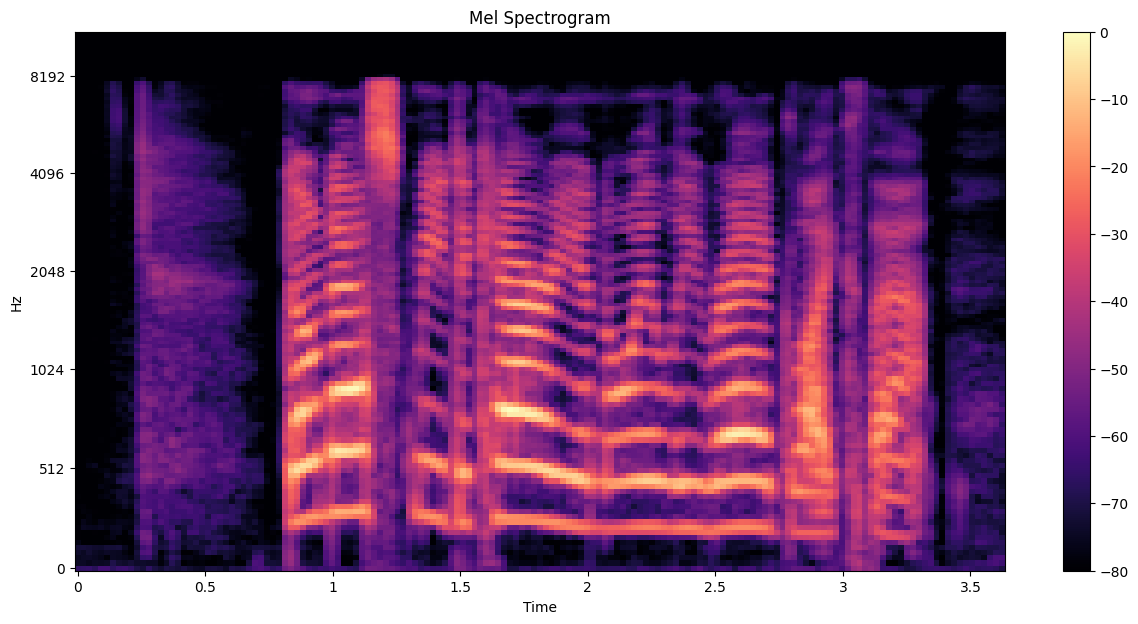

In [4]:
mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

librosa.display.specshow(
    mel_spec_db, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title('Mel Spectrogram');

In [5]:
import nemo.collections.asr as nemo_asr
import os

squeezeformer_checkpoint_path = "./checkpoints/squeezeformer-xs-ctc-bpe"
if not os.path.exists(squeezeformer_checkpoint_path):
    asr_model = nemo_asr.models.EncDecCTCModelBPE.from_pretrained(model_name="stt_en_squeezeformer_ctc_xsmall_ls")
    asr_model.save_to(squeezeformer_checkpoint_path)
asr_model = nemo_asr.models.EncDecCTCModelBPE.restore_from(squeezeformer_checkpoint_path)


[NeMo I 2024-07-13 13:06:43 mixins:172] Tokenizer SentencePieceTokenizer initialized with 128 tokens


[NeMo W 2024-07-13 13:06:43 modelPT:176] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /data/tarred_train/tarred_audio_manifest.json
    sample_rate: 16000
    batch_size: 32
    shuffle: true
    num_workers: 8
    pin_memory: true
    use_start_end_token: false
    trim_silence: false
    max_duration: 16.7
    min_duration: 0.1
    is_tarred: true
    tarred_audio_filepaths: /data/tarred_train/audio__OP_0..511_CL_.tar
    shuffle_n: 2048
    bucketing_strategy: synced_randomized
    bucketing_batch_size: null
    
[NeMo W 2024-07-13 13:06:43 modelPT:183] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath:
    - /data

[NeMo I 2024-07-13 13:06:43 features:305] PADDING: 0
[NeMo I 2024-07-13 13:06:44 save_restore_connector:263] Model EncDecCTCModelBPE was successfully restored from /home/robert/uni/ASRTest/checkpoints/squeezeformer-xs-ctc-bpe.


In [6]:
asr_model.state_dict()

OrderedDict([('preprocessor.featurizer.window',
              tensor([0.0000e+00, 6.1989e-05, 2.4796e-04, 5.5784e-04, 9.9158e-04, 1.5491e-03,
                      2.2301e-03, 3.0347e-03, 3.9624e-03, 5.0132e-03, 6.1867e-03, 7.4826e-03,
                      8.9007e-03, 1.0441e-02, 1.2102e-02, 1.3884e-02, 1.5787e-02, 1.7810e-02,
                      1.9952e-02, 2.2214e-02, 2.4594e-02, 2.7091e-02, 2.9706e-02, 3.2438e-02,
                      3.5286e-02, 3.8249e-02, 4.1326e-02, 4.4517e-02, 4.7821e-02, 5.1238e-02,
                      5.4765e-02, 5.8403e-02, 6.2150e-02, 6.6006e-02, 6.9970e-02, 7.4040e-02,
                      7.8216e-02, 8.2497e-02, 8.6881e-02, 9.1367e-02, 9.5955e-02, 1.0064e-01,
                      1.0543e-01, 1.1031e-01, 1.1530e-01, 1.2037e-01, 1.2554e-01, 1.3081e-01,
                      1.3616e-01, 1.4161e-01, 1.4714e-01, 1.5277e-01, 1.5847e-01, 1.6427e-01,
                      1.7014e-01, 1.7610e-01, 1.8214e-01, 1.8826e-01, 1.9445e-01, 2.0072e-01,
            

In [7]:
asr_model.transcribe(audio=audiofilepath)

Transcribing: 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]


["don't ask me to carry an oily rag like that"]